## Using a PINN to solve a nonlinear time-dependent ODE without any data (other than initial condtition)
ODE:  $dy/dt = -ty/(1+y^2)$

Initial condition: $y=2$

#### ODE Definition

In [1]:
def dydt(y,t):
    return -y*t/(1+y**2)

y0 = 2 # Initial condition

Text(0.5, 1.0, 'True solution')

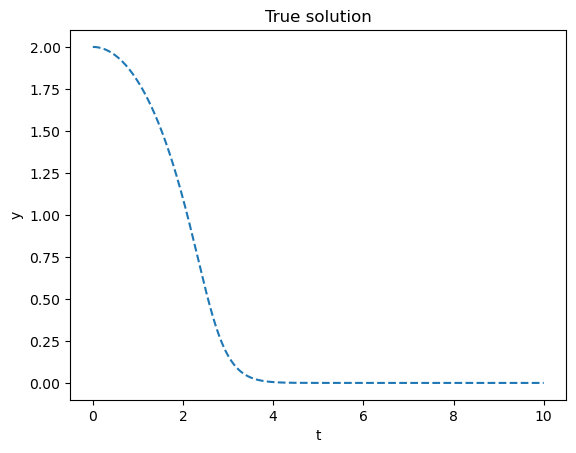

In [2]:
# True solution:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

ts = np.linspace(0,10,1000)
ys = odeint(dydt,y0,ts)

plt.plot(ts,ys,'--')
plt.xlabel('t')
plt.ylabel('y')
plt.title('True solution')

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(1, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1)
)

ts_test = np.linspace(0,5,100)
ts_test_with_grad = torch.tensor(ts_test, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
def ODE_loss(model):
    ys_model = model(ts_test_with_grad)
    dydt_model = torch.autograd.grad(outputs=ys_model, inputs=ts_test_with_grad, 
                                     grad_outputs=torch.ones_like(ys_model), create_graph=True)[0]
    dydt_true = dydt(ys_model,ts_test_with_grad)
    return torch.mean((dydt_true - dydt_model)**2)

optimizer = optim.Adam(model.parameters(), lr=0.01)

# Initial time:
t0 = torch.tensor([[ts_test[0]]], dtype=torch.float32)

In [4]:
N_EPOCHS = 5000
for epoch in range(N_EPOCHS):
    # Loss is ODE_loss + Initial condition loss
    loss = ODE_loss(model) + (model(t0) - y0)**2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%200 == 0:
        print('epoch:',epoch,"  loss=",loss.item())

epoch: 0   loss= 4.687668800354004
epoch: 200   loss= 0.04237530380487442
epoch: 400   loss= 0.005115967243909836
epoch: 600   loss= 0.0033673299476504326
epoch: 800   loss= 0.0017184998141601682
epoch: 1000   loss= 0.0009803608991205692
epoch: 1200   loss= 0.0006603235960938036
epoch: 1400   loss= 0.0004747393249999732
epoch: 1600   loss= 0.00035704972106032073
epoch: 1800   loss= 0.00027012877399101853
epoch: 2000   loss= 0.0002096903626807034
epoch: 2200   loss= 0.0006599985645152628
epoch: 2400   loss= 0.00012726309068966657
epoch: 2600   loss= 9.720399975776672e-05
epoch: 2800   loss= 7.561933307442814e-05
epoch: 3000   loss= 5.596082701231353e-05
epoch: 3200   loss= 4.492817242862657e-05
epoch: 3400   loss= 3.353843203512952e-05
epoch: 3600   loss= 2.918658901762683e-05
epoch: 3800   loss= 2.2969094061409123e-05
epoch: 4000   loss= 2.2419804736273363e-05
epoch: 4200   loss= 1.8212218492408283e-05
epoch: 4400   loss= 3.160920095979236e-05
epoch: 4600   loss= 1.4888472833263222e-05

Text(0, 0.5, 'y')

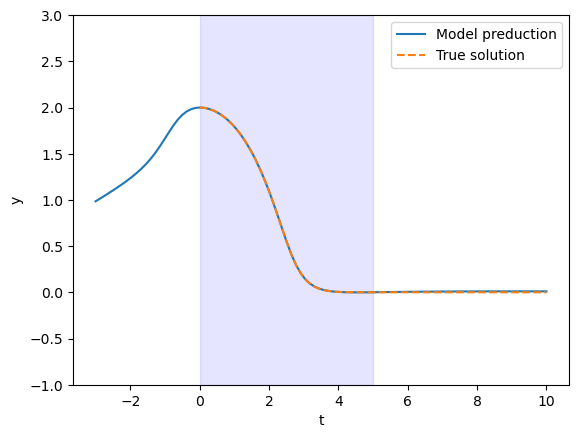

In [5]:
ts_test = np.linspace(-3,10,100)
ts_test_torch = torch.tensor(ts_test, dtype=torch.float32).reshape(-1, 1)
ys_model = model(ts_test_torch).detach().cpu().numpy()
plt.plot(ts_test,ys_model)
plt.plot(ts,ys,'--')
plt.legend(['Model preduction','True solution'])
plt.axvspan(0, 5, color='blue', alpha=0.1)
plt.ylim(-1,3)
plt.xlabel('t')
plt.ylabel('y')